In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import asc, desc

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Look at first row and check data format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26311ad4d60>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f"The most recent date on record is: {recent_date}")

The most recent date on record is: 2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days = 365)
twelve_months_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_months_ago).all()
# Display the data
precipitation_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [13]:
# Save the query results as a Pandas DataFrame
precipitation_data_df = pd.DataFrame(precipitation_data, columns = ["Date", "Precipitation"])
# Set the index to the date column
precipitation_data_df.set_index("Date", inplace = True)
# Sort the dataframe by date
precipitation_data_df.sort_index(ascending = True, inplace = True)
# Preview the dataframe
precipitation_data_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


<function matplotlib.pyplot.show(close=None, block=None)>

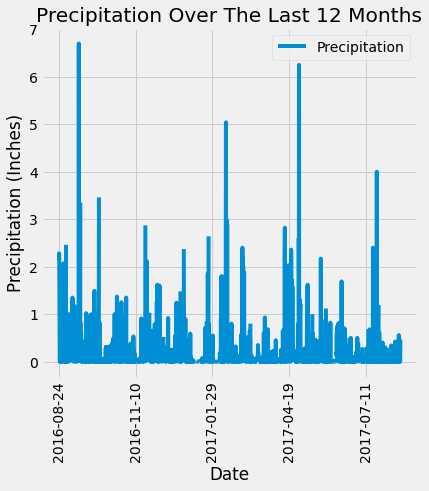

In [14]:
# Plot the precipitation for the past 12 months
precipitation_data_df.plot(rot = 90, use_index = True, figsize = (6,6), legend = True)
# Set the xlabel, ylabel, chart title
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title("Precipitation Over The Last 12 Months")
# Show plot
plt.show

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {station_count} unique stations in the dataset.")

There are 9 unique stations in the dataset.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
records_per_station = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
# Create dataframe from the data above
records_per_station_df = pd.DataFrame(records_per_station, columns = ["Station ID", "Number Of Rows"])
# Display the record counts
records_per_station_df

,Station ID,Number Of Rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Identify most active station
most_active_station = records_per_station[0][0]
print(f"Most active station is {most_active_station}")

Most active station is USC00519281


In [19]:
# Using the most active station id
# Display lowest temperature
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"The lowest temperature for {most_active_station} is {lowest_temp[0][0]}°F.")

The lowest temperature for USC00519281 is 54.0°F.


In [20]:
# Using the most active station id
# Display highest temperature
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"The highest temperature for {most_active_station} is {highest_temp[0][0]}°F.")

The highest temperature for USC00519281 is 85.0°F.


In [21]:
# Using the most active station id
# Display the average temperature
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"The average temperature for {most_active_station} is {average_temp[0][0]}°F.")

The average temperature for USC00519281 is 71.66378066378067°F.


<function matplotlib.pyplot.show(close=None, block=None)>

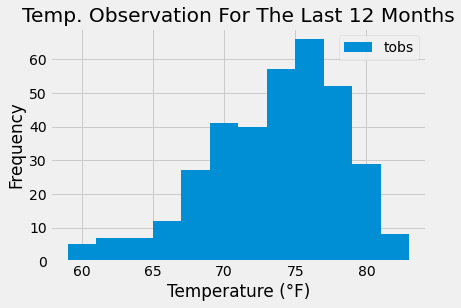

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                 filter(Measurement.station == most_active_station).filter(Measurement.date >= twelve_months_ago).all()
last_year_data_df = pd.DataFrame(last_year_data, columns = ["Station ID", "Date", "tobs"])
# Plot "tobs" for the past 12 months
fig, ax = plt.subplots()
ax.hist(last_year_data_df["tobs"], bins = 12)
plt.legend(["tobs"])
# Set the xlabel, ylabel, chart title
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temp. Observation For The Last 12 Months")
# Show plot
plt.show

# Close session

In [23]:
# Close Session
session.close()